Mean (data1)= 5.843333333333335 Mean (data2)= 3.0540000000000007
Mode (data1)= [5.0] Mode (data2)= [3.0]
Median= 5.8 Median (data2)= 3.0
Variance1= 0.6811222222222227
Variance2= 0.18675066666666673
Covariance= 0.3509933333333333
Correlation= 0.9841363255258477
Std dev= 0.8253012917851412
Std dev= 0.4321465800705436


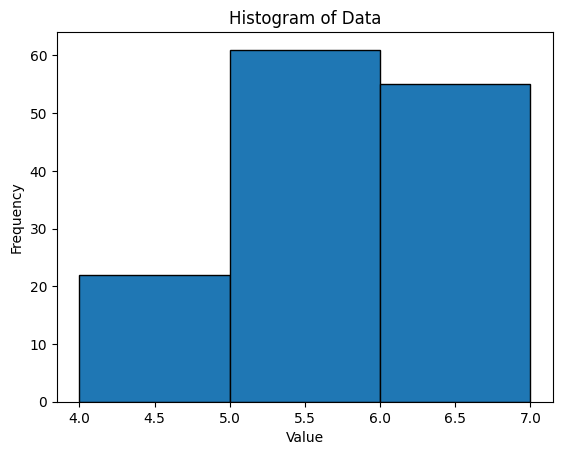

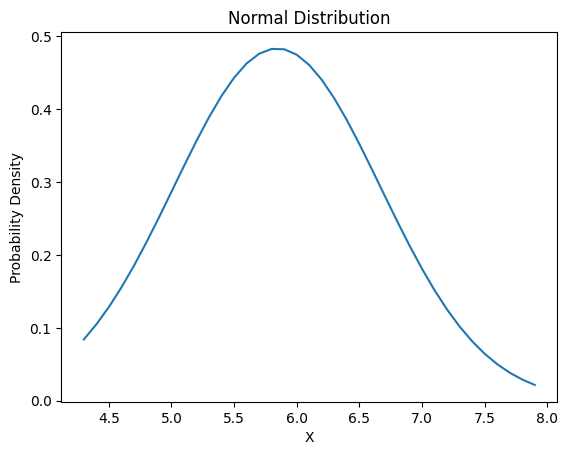

In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/Iris.csv')


def calculate_mean(data):
    return sum(data) / len(data)


def calculate_mode(data):
    frequency_dict = {}
    for item in data:
        if item in frequency_dict:
            frequency_dict[item] += 1
        else:
            frequency_dict[item] = 1
    mode = [key for key, value in frequency_dict.items() if value == max(frequency_dict.values())]
    return mode


def calculate_median(data):
    data.sort()
    n = len(data)
    if n % 2 == 0:
        median = (data[n // 2 - 1] + data[n // 2]) / 2
    else:
        median = data[n // 2]
    return median


def calculate_normal_distribution(data, x):
    mean = calculate_mean(data)
    variance = calculate_variance(data)
    std_dev = math.sqrt(variance)
    exponent = -(x - mean) ** 2 / (2 * variance)
    return (1 / (std_dev * math.sqrt(2 * math.pi))) * math.exp(exponent)


def calculate_variance(data):
    mean = calculate_mean(data)
    return sum((x - mean) ** 2 for x in data) / len(data)

def calculate_covariance(data1, data2):
    mean1 = calculate_mean(data1)
    mean2 = calculate_mean(data2)
    covariance = sum((x1 - mean1) * (x2 - mean2) for x1, x2 in zip(data1, data2)) / len(data1)
    return covariance


def calculate_correlation(data1, data2):
    covariance = calculate_covariance(data1, data2)
    std_dev1 = math.sqrt(calculate_variance(data1))
    std_dev2 = math.sqrt(calculate_variance(data2))
    correlation = covariance / (std_dev1 * std_dev2)
    return correlation

#def calculate_correlation(data1, data2):
 #   std_dev1 = math.sqrt(calculate_variance(data1))

def calculate_sd(data1):
    std_dev1 = math.sqrt(calculate_variance(data1))
    return std_dev1

# Sample data given in problem:
d = df['sepallength']
data = d.tolist()

dd = df['sepalwidth']
data2 = dd.tolist()



mean = calculate_mean(data)
mean2 =calculate_mean(data2)
mode = calculate_mode(data)
mode2 = calculate_mode(data2)
median = calculate_median(data)
median2 = calculate_median(data2)
variance = calculate_variance(data)
variance2 = calculate_variance(data2)
cov = calculate_covariance(data, data2)
corrl = calculate_correlation(data, data2)
sd_1= calculate_sd(data)
sd_2= calculate_sd(data2)


print("Mean (data1)=", mean,"Mean (data2)=",mean2)
print("Mode (data1)=", mode,"Mode (data2)=",mode2)
print("Median=", median,"Median (data2)=",median2)

print("Variance1=", variance)
print("Variance2=", variance2)
print("Covariance=",cov)
print("Correlation=",corrl)
print("Std dev=",sd_1)
print("Std dev=",sd_2)


min_val = int(min(data))
max_val = int(max(data))
plt.hist(data, bins=range(min_val, max_val + 1), edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

x = [i / 10 for i in range(int(min(data) * 10), int(max(data) * 10) + 1)]
y = [calculate_normal_distribution(data, xi) for xi in x]

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.show()